In [3]:
import feather
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to your Feather file
feather_file_path = '/allah/freqtrade/user_data/data/binance/futures/ETH_USDT_USDT-1m-futures.feather'

# Read the data from the Feather file into a DataFrame
df_binance_1m = feather.read_dataframe(feather_file_path)
df_binance_1m['date'] = df_binance_1m['date'].dt.strftime('%Y-%m-%d %H:%M:%S')


# Now, 'df' contains your data as a DataFrame, and you can perform analysis on it.

In [4]:
df_binance_1m

,date,open,high,low,close,volume
0,2019-11-27 07:45:00,146.00,146.00,146.00,146.00,0.010
1,2019-11-27 07:46:00,146.00,146.00,146.00,146.00,0.000
2,2019-11-27 07:47:00,146.00,146.00,146.00,146.00,0.000
3,2019-11-27 07:48:00,146.00,146.00,146.00,146.00,0.000
4,2019-11-27 07:49:00,146.00,146.00,146.00,146.00,0.000
...,...,...,...,...,...,...
2054980,2023-10-24 09:25:00,1822.20,1822.72,1820.98,1822.00,1326.419
2054981,2023-10-24 09:26:00,1822.00,1822.99,1821.30,1821.36,751.687
2054982,2023-10-24 09:27:00,1821.37,1822.10,1821.35,1821.49,809.864
2054983,2023-10-24 09:28:00,1821.49,1822.00,1821.31,1821.84,1510.152


In [2]:
import pandas as pd
# Assuming df_combined is your DataFrame
df_analyzed = df_binance_1m.copy()
df_analyzed['date'] = pd.to_datetime(df_analyzed['date']) + pd.DateOffset(hours=8)

filtered_df = df_analyzed[
    df_analyzed['volume'] > (df_analyzed['volume'].rolling(window=6, min_periods=1).sum() - df_analyzed['volume'])
]
# Display the resulting DataFrame (last 100 rows)
filtered_df[-10:]


,date,open,high,low,close,volume
2025540,2023-10-04 06:45:00,1651.06,1651.06,1650.00,1650.00,2228.579
2025541,2023-10-04 06:46:00,1650.00,1650.09,1648.35,1649.70,8599.504
2025551,2023-10-04 06:56:00,1650.10,1653.00,1650.10,1652.99,3108.841
2025552,2023-10-04 06:57:00,1652.99,1658.58,1652.30,1657.65,7521.627
2025615,2023-10-04 08:00:00,1656.19,1656.89,1655.85,1656.51,1682.648
2025646,2023-10-04 08:31:00,1647.53,1647.54,1615.00,1632.50,69943.491
2025840,2023-10-04 11:45:00,1641.72,1642.92,1641.71,1642.87,1350.643
2026018,2023-10-04 14:43:00,1637.51,1638.29,1636.70,1637.73,5264.115
2026035,2023-10-04 15:00:00,1641.64,1642.45,1641.22,1642.10,4028.941
2026213,2023-10-04 17:58:00,1648.03,1651.31,1648.03,1650.86,9015.220


33.44117647058823


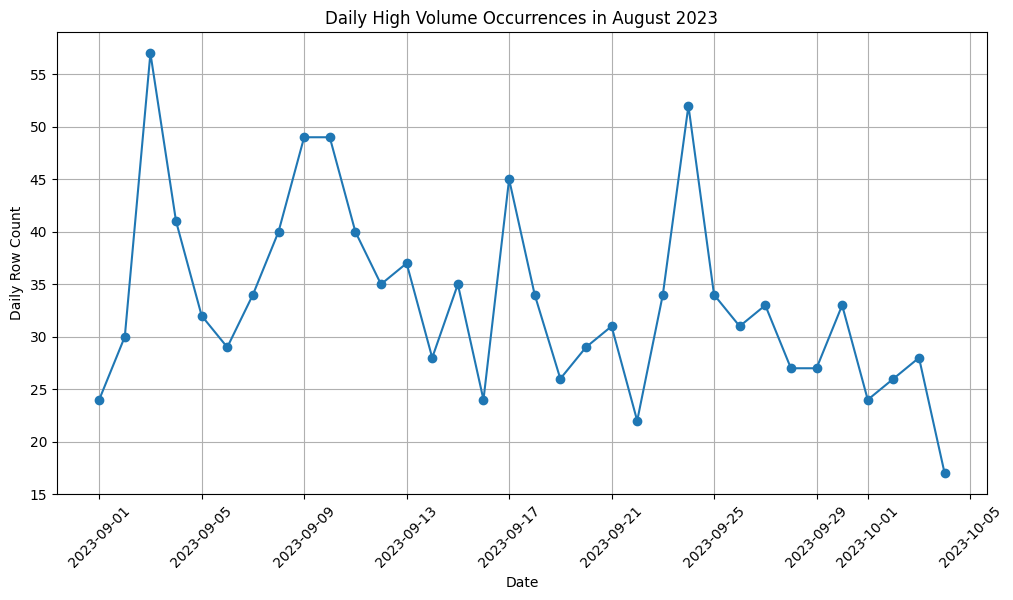

In [6]:
# Filter rows for August 2023
filtered_df_august_2023 = filtered_df[
    (filtered_df['date'].dt.year == 2023) & (filtered_df['date'].dt.month == 10) | (filtered_df['date'].dt.year == 2023) & (filtered_df['date'].dt.month == 9)
]

# Group by date (day) and count the occurrences
daily_occurrences = filtered_df_august_2023.groupby(filtered_df_august_2023['date'].dt.date)['date'].count()
print(daily_occurrences.mean())
# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(daily_occurrences.index, daily_occurrences.values, marker='o', linestyle='-')
plt.title('Daily High Volume Occurrences in August 2023')
plt.xlabel('Date')
plt.ylabel('Daily Row Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()